# Using Neural Networks

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [16]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


When 0 is inputed (xs), we want 5 to have a high probability (ys),

When 5 is input, we want 13,

etc.

In [17]:
xs

tensor([ 0,  5, 13, 13,  1])

In [18]:
ys

tensor([ 5, 13, 13,  1,  0])

### One-hot encoding

In [19]:
import torch.nn.functional as F

In [24]:
# One-hot encoding, converting from int64 to float32
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
xenc.shape

torch.Size([5, 27])

Inputs 1 in yellow and 0 in purple

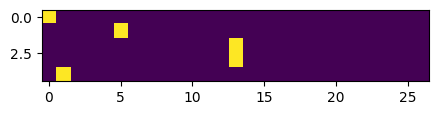

In [26]:
plt.figure(figsize=(5,5))
plt.imshow(xenc)

In [27]:
xenc.dtype

torch.float32

### Weights

Toy example with only 1 Neuron (27, 1)

In [29]:
# A column Vector
W = torch.rand((27, 1))
W

tensor([[0.3675],
        [0.2182],
        [0.1128],
        [0.1146],
        [0.6597],
        [0.6873],
        [0.9078],
        [0.1295],
        [0.6714],
        [0.5776],
        [0.5652],
        [0.5796],
        [0.3261],
        [0.6189],
        [0.3169],
        [0.4168],
        [0.4263],
        [0.7474],
        [0.9784],
        [0.7467],
        [0.1237],
        [0.9831],
        [0.5542],
        [0.8203],
        [0.4622],
        [0.9170],
        [0.2502]])

In [30]:
# (5, 27) @ (27, 1) --> (5, 1)
mmul = xenc @ W

In [31]:
# Output: 5 activations
mmul

tensor([[0.3675],
        [0.6873],
        [0.6189],
        [0.6189],
        [0.2182]])

27 Neurons now (27, 27)

In [40]:
W = torch.rand((27, 27))
W

tensor([[0.9366, 0.5190, 0.9764, 0.4486, 0.5554, 0.8981, 0.4531, 0.0479, 0.6779,
         0.7846, 0.6378, 0.1561, 0.3133, 0.0240, 0.6037, 0.0444, 0.8018, 0.6966,
         0.0090, 0.5997, 0.1699, 0.8836, 0.8057, 0.3450, 0.7114, 0.8646, 0.0089],
        [0.9135, 0.8817, 0.5788, 0.2431, 0.3961, 0.7055, 0.1113, 0.5795, 0.7377,
         0.3734, 0.4681, 0.4328, 0.2073, 0.2705, 0.8959, 0.4624, 0.9733, 0.1387,
         0.2958, 0.1278, 0.9244, 0.7165, 0.0402, 0.8755, 0.4809, 0.6072, 0.4759],
        [0.7181, 0.9653, 0.3309, 0.8266, 0.1296, 0.3340, 0.7018, 0.0813, 0.1959,
         0.0732, 0.9118, 0.8659, 0.3878, 0.9871, 0.1771, 0.1730, 0.3598, 0.2156,
         0.1981, 0.6877, 0.8399, 0.7574, 0.1268, 0.0167, 0.7191, 0.9575, 0.2276],
        [0.2487, 0.4109, 0.2606, 0.8658, 0.4657, 0.5404, 0.4052, 0.3889, 0.9796,
         0.3006, 0.7508, 0.3038, 0.2279, 0.7442, 0.4300, 0.1646, 0.6438, 0.2670,
         0.6080, 0.0747, 0.2142, 0.7981, 0.1193, 0.2860, 0.4178, 0.8032, 0.8103],
        [0.5840, 0.4357,

In [42]:
xenc.shape, W.shape

(torch.Size([5, 27]), torch.Size([27, 27]))

In [43]:
# (5, 27) @ (27, 27) -> (5, 27)
mmul = xenc @ W
mmul.shape

torch.Size([5, 27])

In [51]:
# Firing rate of the 13th neuron (i.e. 13th column of W), looking at the 3rd input (i.e. of xenc)
(xenc @ W)[3, 13]

tensor(0.3795)

#### We can do this matrix multiplication step-by-step

In [46]:
xenc_3 = xenc[3]

In [48]:
W_13 = W[:, 13]

We have the same result as the one from above.

In [52]:
(xenc_3 * W_13).sum()

tensor(0.3795)

#### Predict output probability

Negative numbers are smaller than 1.

Positive numbers are greater than 1.

Thanks to the exp, we can count.

In [55]:
# log counts = logits
logits = xenc @ W
logits

tensor([[0.9366, 0.5190, 0.9764, 0.4486, 0.5554, 0.8981, 0.4531, 0.0479, 0.6779,
         0.7846, 0.6378, 0.1561, 0.3133, 0.0240, 0.6037, 0.0444, 0.8018, 0.6966,
         0.0090, 0.5997, 0.1699, 0.8836, 0.8057, 0.3450, 0.7114, 0.8646, 0.0089],
        [0.1258, 0.2447, 0.1917, 0.0778, 0.9824, 0.9961, 0.1257, 0.9962, 0.7482,
         0.0694, 0.9248, 0.9177, 0.3504, 0.9840, 0.6242, 0.0179, 0.9180, 0.0224,
         0.0084, 0.0039, 0.1443, 0.7109, 0.4794, 0.4594, 0.6280, 0.5412, 0.8272],
        [0.4077, 0.1372, 0.5140, 0.0969, 0.1731, 0.7660, 0.2043, 0.8372, 0.4805,
         0.5406, 0.1567, 0.4494, 0.3641, 0.3795, 0.4450, 0.4580, 0.8718, 0.3630,
         0.4909, 0.6181, 0.3448, 0.0902, 0.2372, 0.7876, 0.4160, 0.1699, 0.2071],
        [0.4077, 0.1372, 0.5140, 0.0969, 0.1731, 0.7660, 0.2043, 0.8372, 0.4805,
         0.5406, 0.1567, 0.4494, 0.3641, 0.3795, 0.4450, 0.4580, 0.8718, 0.3630,
         0.4909, 0.6181, 0.3448, 0.0902, 0.2372, 0.7876, 0.4160, 0.1699, 0.2071],
        [0.9135, 0.8817,

In [57]:
counts = logits.exp()
counts

tensor([[2.5513, 1.6803, 2.6550, 1.5660, 1.7426, 2.4548, 1.5731, 1.0491, 1.9698,
         2.1916, 1.8922, 1.1689, 1.3679, 1.0243, 1.8289, 1.0454, 2.2296, 2.0069,
         1.0090, 1.8216, 1.1852, 2.4195, 2.2382, 1.4119, 2.0368, 2.3740, 1.0089],
        [1.1340, 1.2773, 1.2113, 1.0809, 2.6709, 2.7077, 1.1340, 2.7080, 2.1132,
         1.0719, 2.5214, 2.5036, 1.4196, 2.6752, 1.8668, 1.0180, 2.5044, 1.0226,
         1.0085, 1.0039, 1.1552, 2.0358, 1.6151, 1.5831, 1.8738, 1.7180, 2.2868],
        [1.5033, 1.1471, 1.6720, 1.1018, 1.1890, 2.1511, 1.2266, 2.3098, 1.6169,
         1.7170, 1.1696, 1.5674, 1.4393, 1.4615, 1.5606, 1.5809, 2.3912, 1.4376,
         1.6338, 1.8554, 1.4116, 1.0944, 1.2677, 2.1981, 1.5159, 1.1852, 1.2301],
        [1.5033, 1.1471, 1.6720, 1.1018, 1.1890, 2.1511, 1.2266, 2.3098, 1.6169,
         1.7170, 1.1696, 1.5674, 1.4393, 1.4615, 1.5606, 1.5809, 2.3912, 1.4376,
         1.6338, 1.8554, 1.4116, 1.0944, 1.2677, 2.1981, 1.5159, 1.1852, 1.2301],
        [2.4931, 2.4149,

In [59]:
# Normalize the rows (sum over 1st dim)
probs = counts / counts.sum(1, keepdim=True)

In [60]:
# Every row sums to 1
probs[0].sum()

tensor(1.0000)

In [61]:
probs[0].shape

torch.Size([27])

In [63]:
# The first vector represents the 
#. e
#e m
#m m
#m a
#a ." 
probs[0]

tensor([0.0537, 0.0354, 0.0559, 0.0330, 0.0367, 0.0517, 0.0331, 0.0221, 0.0415,
        0.0461, 0.0398, 0.0246, 0.0288, 0.0216, 0.0385, 0.0220, 0.0469, 0.0422,
        0.0212, 0.0383, 0.0250, 0.0509, 0.0471, 0.0297, 0.0429, 0.0500, 0.0212])

## Summary by Andrej

In [64]:
xs

tensor([ 0,  5, 13, 13,  1])

In [65]:
ys

tensor([ 5, 13, 13,  1,  0])

In [66]:
g = torch.Generator().manual_seed(2147483647)
W = torch.rand((27, 27))

In [68]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts

# Count and probs taken together <==> softmax
counts = logits.exp() # counts, quivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [69]:
probs.shape

torch.Size([5, 27])

### How to interpret?

The 'output probabilities from the neural net' gives all the probabilities for the 27 elements

The 'label' is what we try to predict.

The 'probability assigned by the net to the the correct character' is what the network believe is the probability of the label being the actual correct output. If this is low, it is not good. In this case, this is likely to happen because we haven't really trained the network yet.

A high negative log likelihood is a bad score.

In [96]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes: ({x}, {y}))')
  print('input to the neural net:', x)
  print(f'output probabilities from the neural net:\n---\n {probs[i]}\n---')
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print(f'negative log likelihood: {nll.item()}\n')
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes: (0, 5))
input to the neural net: 0
output probabilities from the neural net:
---
 tensor([0.0339, 0.0333, 0.0225, 0.0234, 0.0522, 0.0248, 0.0416, 0.0559, 0.0306,
        0.0347, 0.0410, 0.0530, 0.0288, 0.0371, 0.0284, 0.0341, 0.0217, 0.0431,
        0.0276, 0.0424, 0.0473, 0.0525, 0.0434, 0.0452, 0.0341, 0.0258, 0.0418])
---
label (actual next character): 5
probability assigned by the net to the the correct character: 0.02480095811188221
log likelihood: -3.6968729496002197
negative log likelihood: 3.6968729496002197

--------
bigram example 2: em (indexes: (5, 13))
input to the neural net: 5
output probabilities from the neural net:
---
 tensor([0.0324, 0.0341, 0.0450, 0.0525, 0.0269, 0.0378, 0.0558, 0.0277, 0.0554,
        0.0283, 0.0304, 0.0297, 0.0222, 0.0500, 0.0303, 0.0232, 0.0260, 0.0324,
        0.0500, 0.0441, 0.0441, 0.0424, 0.0436, 0.0234, 0.0476, 0.0309, 0.0339])
---
label (actual next character): 13
probability assigned by the net to 

## Optimization

If we were to change W, the scores (negative log likelihood) would change!

In [87]:
xs

tensor([ 0,  5, 13, 13,  1])

In [88]:
ys

tensor([ 5, 13, 13,  1,  0])

In [99]:
g = torch.Generator().manual_seed(2147483647)
W = torch.rand((27, 27), generator=g)

In [100]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts

# Count and probs taken together <==> softmax
counts = logits.exp() # counts, quivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [101]:
probs.shape

torch.Size([5, 27])

In [102]:
# Give [input, output] and see what the probability is for each
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0229),
 tensor(0.0258),
 tensor(0.0339),
 tensor(0.0341),
 tensor(0.0402))

We can do the same in a less verbose way:

In [103]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [104]:
probs[torch.arange(5), ys]

tensor([0.0229, 0.0258, 0.0339, 0.0341, 0.0402])

In [105]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.4815)

## Clean version #1

In [113]:
# Randomly initialize 27 neurons' weights. Each of these 27 neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.rand((27, 27), generator=g, requires_grad=True)

### Forward Pass

Pytorch builds a full computational graph, i.e. it keeps track of all the operations and dependencies.

In [114]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts

# Count and probs taken together <==> softmax
counts = logits.exp() # counts, quivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

### Backward Pass

'.backward()' will fill-in the gradients, all the way back to W

In [115]:
W.grad = None # Set to zero the gradient
loss.backward()

In [119]:
print(loss.item())

3.4815192222595215


In [116]:
W.grad

tensor([[ 0.0085,  0.0060,  0.0047,  0.0076,  0.0046, -0.1954,  0.0101,  0.0113,
          0.0042,  0.0056,  0.0088,  0.0063,  0.0099,  0.0088,  0.0062,  0.0052,
          0.0085,  0.0113,  0.0109,  0.0065,  0.0085,  0.0044,  0.0094,  0.0057,
          0.0113,  0.0059,  0.0052],
        [-0.1920,  0.0103,  0.0061,  0.0080,  0.0052,  0.0064,  0.0079,  0.0060,
          0.0062,  0.0110,  0.0094,  0.0080,  0.0078,  0.0094,  0.0116,  0.0077,
          0.0068,  0.0080,  0.0049,  0.0067,  0.0046,  0.0047,  0.0098,  0.0062,
          0.0070,  0.0051,  0.0073],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [117]:
W.shape

torch.Size([27, 27])

In [118]:
W.data += -0.1 * W.grad

# Clean Version #2

In [125]:
# create the dataset
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [129]:
# gradient descent
for k in range(10):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(f'iteration={k} : loss={loss.item():.4f}')
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

iteration=0 : loss=2.4873
iteration=1 : loss=2.4872
iteration=2 : loss=2.4871
iteration=3 : loss=2.4870
iteration=4 : loss=2.4869
iteration=5 : loss=2.4868
iteration=6 : loss=2.4867
iteration=7 : loss=2.4866
iteration=8 : loss=2.4865
iteration=9 : loss=2.4864


In [122]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjdjdjancqydjufhqyywecnw.
.
oiin.
toziasz.
twt.
